In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import cv2

In [2]:
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

def uint8ify(img):
    img -= img.min()
    img /= img.max()
    img *= 255
    return np.uint8(img)

def overlay(a,b):
    # a and b should be float images and between 0-1

    mask = a >= 0.5 # generate boolean mask of everywhere a > 0.5 
    ab = np.zeros_like(a) # generate an output container for the blended image 

    # now do the blending 
    ab[~mask] = (2*a*b)[~mask] # 2ab everywhere a<0.5
    ab[mask] = (1-2*(1-a)*(1-b))[mask] # else this
    
    return ab

def before_after(img_a, img_b, name='', vmin=None, vmax=None, effect_name='Processed'):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f'{name} Original')
    axs[1].set_title(f'{name} {effect_name}')
    if vmin is not None and vmax is not None:
        axs[0].imshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
        axs[1].imshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        axs[0].imshow(img_a, cmap='gray')
        axs[1].imshow(img_b, cmap='gray')
    plt.show()

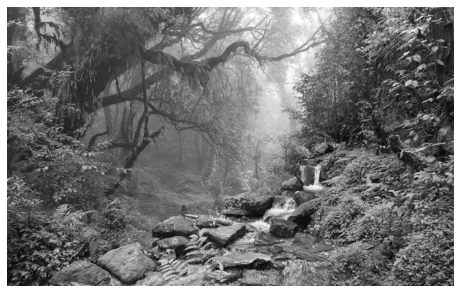

(450, 720)

In [85]:
bg = cv2.imread("jungle.jpg", -1).astype(np.float32)
kernel = cv2.imread("kernel.png", 0)

bg = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
disp(bg**0.65)
bg.shape

In [87]:
from ipywidgets import interact

@interact(r=(0.1,5,0.01))
def do(r=1.0):
    h, w = kernel.shape
    kernel_resized = cv2.resize(kernel, (int(h*r), int(w*r)))
    filtered = cv2.filter2D(bg**0.9, -1, kernel_resized)
    disp(filtered, s=10)
    print(kernel_resized.shape)

interactive(children=(FloatSlider(value=1.0, description='r', max=5.0, min=0.1, step=0.01), Output()), _dom_cl…

In [40]:
filtered

array([[12612342. , 12580923. , 12533523. , ..., 21612830. , 22310074. ,
        22546932. ],
       [12604892. , 12599138. , 12558689. , ..., 21918020. , 22568242. ,
        22702700. ],
       [12441146. , 12447212. , 12462083. , ..., 21821994. , 22417866. ,
        22619300. ],
       ...,
       [ 5590161. ,  5549501.5,  5461322. , ..., 21292390. , 21406458. ,
        21376376. ],
       [ 5266933.5,  5235990. ,  5242801.5, ..., 22126528. , 22273508. ,
        22290478. ],
       [ 4869571. ,  4884764. ,  5008487. , ..., 22247908. , 22423602. ,
        22485442. ]], dtype=float32)